In [3]:
import cv2
import numpy as np
import msgpack as mp
import msgpack_numpy as mpn
import os
from cv2 import aruco

import mediapipe as mp
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import pickle
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'cv2'

In [23]:

"""open file dialog and path selection"""
calib_pth = "..//src//calib_aruco_dict_original_01.pickle"
print(str(calib_pth))
# Check for camera calibration data
if not os.path.exists(calib_pth):
    print("You need to calibrate the camera you'll be using. See calibration project directory for details.")
    exit()
else:
    f = open(calib_pth, "rb")
    (cameraMatrix, distCoeffs) = pickle.load(f)
    f.close()
    if cameraMatrix is None or distCoeffs is None:
        print(
            "Calibration issue. Remove ./calibration/CameraCalibration.pckl and recalibrate your camera with calibration_ChAruco.py.")
        exit()
       
# Constant parameters used in Aruco methods
ARUCO_PARAMETERS = aruco.DetectorParameters_create()
ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_ARUCO_ORIGINAL)

# Create grid board object we're using in our stream
board = aruco.GridBoard_create(
    markersX=1,
    markersY=1,
    markerLength=0.05,
    markerSeparation=0.01,
    dictionary=ARUCO_DICT)

# Create vectors we'll be using for rotations and translations for postures
rotation_vectors, translation_vectors = None, None
axis = np.float32([[-.5, -.5, 0], [-.5, .5, 0], [.5, .5, 0], [.5, -.5, 0],
                   [-.5, -.5, 1], [-.5, .5, 1], [.5, .5, 1], [.5, -.5, 1]])

..//src//calib_aruco_dict_original_01.pickle


In [24]:
# pth = r"C:\mira\splitVideos\SAMXXXXXXXXU010120000000XXXXXXXXX\Session 12-10-21_10-54-24_655" #prem #39 blocks
pth = r"C:\mira\splitVideos\SAMXXXXXXXXU010120000000XXXXXXXXX\Session 12-10-21_15-01-57_80" #sam #18 blocks

In [25]:
files = os.listdir(pth)
vidfile = files[len(files)-1]
vidfile

'Video.avi'

In [26]:
"""opening video"""
cap = cv2.VideoCapture(pth+"//"+vidfile)
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_pose = mp.solutions.pose
data_points= []
res = []

In [27]:

def peaks(data, threshold):
    count = 0
    trigger = True
    for i in data:
        if i>threshold and trigger:
                count +=1
                trigger = False
        if i<threshold and not trigger:
            trigger = True
    return count
    

In [28]:
cc = 0

while cap.isOpened:
    ret, image = cap.read()
    if cc == 0:
        img_glb = image
        cc+=1
    if ret:
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        datax = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * 864
        datay = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * 736
        data_points = np.append(data_points, datax)
        # peaks, _ = find_peaks(data_points, height=390)
        res.append(results)
        peak = peaks(data_points, 390)
        # print(peak)
        mp_drawing.draw_landmarks(image, results.pose_landmarks,
                                        mp_holistic.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=1,
                                                                    circle_radius=2),
                                        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=1,
                                                                    circle_radius=2)
                                        )

        cv2.imshow("", image)

    if cv2.waitKey(1) & 0xff == ord('q'):
        break
    if not ret:
        break
cv2.destroyAllWindows()

In [8]:
peak

19

[array([[[467., 626.],
         [427., 625.],
         [427., 589.],
         [467., 589.]]], dtype=float32)]

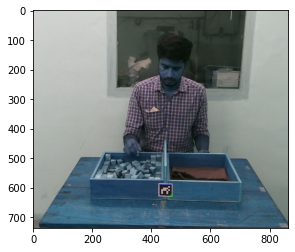

In [9]:
gray = cv2.cvtColor(img_glb, cv2.COLOR_BGR2GRAY)
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
corners, ids, rejectedImgPoints, recoveredIds = aruco.refineDetectedMarkers(
    image=gray,
    board=board,
    detectedCorners=corners,
    detectedIds=ids,
    rejectedCorners=rejectedImgPoints,
    cameraMatrix=cameraMatrix,
    distCoeffs=distCoeffs)

img_glb = aruco.drawDetectedMarkers(img_glb, corners, borderColor=(0, 0, 255))
plt.imshow(img_glb)
corners

In [29]:
peak

19

In [35]:
pose = mp_pose.PoseLandmark
lnd = [pose.LEFT_WRIST, pose.LEFT_ELBOW, pose.LEFT_SHOULDER, pose.RIGHT_WRIST, pose.RIGHT_ELBOW, pose.RIGHT_SHOULDER]

st = ["LEFT_WRIST", "LEFT_ELBOW", "LEFT_SHOULDER", "RIGHT_WRIST", "RIGHT_ELBOW","RIGHT_SHOULDER"]
st1 = ["_X", "_Y", "_Z"]

cl_name = []
for i in lnd:
    cl_name.append(i.name+"_X")
    cl_name.append(i.name+"_Y")

count = 0
# xydata = pd.DataFrame(columns=)
cam_space = pd.DataFrame(columns=cl_name)
count = 0
for res1 in res:
    for i in lnd:
        valx = res1.pose_landmarks.landmark[i].x
        valy = res1.pose_landmarks.landmark[i].y
        cam_space[i.name+"_X"].loc[count] = valx
        cam_space[i.name+"_Y"].loc[count] = valy
        count +=1



cam_space["LEFT_ELBOW_X"].loc[0] = 5


In [42]:
cam_space.loc[0, "LEFT_ELBOW_X"] = 5
cam_space

,LEFT_WRIST_X,LEFT_WRIST_Y,LEFT_ELBOW_X,LEFT_ELBOW_Y,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,RIGHT_WRIST_X,RIGHT_WRIST_Y,RIGHT_ELBOW_X,RIGHT_ELBOW_Y,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y
0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# creating a blank series

Type_new = pd.Series([])
 
# reading csv file
data = pd.read_csv("pokemon.csv")
 
 
# running a for loop and assigning some values to series
for i in range(len(data)):
    if data["Type"][i] == "Grass":
        Type_new[i]="Green"
 
    elif data["Type"][i] == "Fire":
        Type_new[i]="Orange"
 
    elif data["Type"][i] == "Water":
        Type_new[i]="Blue"
 
    else:
        Type_new[i]= data["Type"][i]
 
         
# inserting new column with values of list made above       
data.insert(2, "Type New", Type_new)
# data.insert(3, ["h8i", "sdf"], np.array([23,234]))
# data.insert(4, "Type New", 5)

data["Type New"].loc[1] = "blue"
# list output
# data.head()
data["Type New"].loc[2] = "yellow"
data["Type New"].loc[1]

C:\Users\CMC\anaconda3\envs\py37t2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


'blue'

In [21]:

empt_list = []
empt_list = np.array(empt_list)
empt_list[0:10] = np.nan
empt_list

array([], dtype=float64)

In [12]:
for i in mp_pose.PoseLandmark:
    print(i)

marks = ["LEFT_WRIST", "LEFT_SHOULDER", "LEFT_ELBOW", "RIGHT_WRIST", "RIGHT_SHOULDER", "RIGHT_ELBOW"]

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [ ]:
colorfile = files[0]
cpth = pth+ "\\"+colorfile
ppth = pth + "\\" + files[len(files)-2]
ppth

f = open(cpth, "rb")
unpacker = mp.Unpacker(f, object_hook=mpn.decode)
img = []
for unpacked in unpacker:
    img.append(unpacked)
p = open(ppth, "rb")
unpacker = mp.Unpacker(p, object_hook=mpn.decode)
prm = []
for unpacked in unpacker:
    prm.append(unpacked)
prm